In [10]:
from sklearn.feature_selection import f_classif
import pandas as pd

df = pd.read_csv("../Data/combine-feature.csv")
features = ["LF", "HF", "LF/HF Ratio", "SDNN", "RMSSD", "pNN50"]
X = df[features]
y = df["Class"]

# Hitung F-value
f_values, p_values = f_classif(X, y)

feature_scores = pd.DataFrame({
    "Feature": features,
    "F-value": f_values,
    "p-value": p_values
}).sort_values(by="F-value", ascending=False)

print(feature_scores)

       Feature   F-value   p-value
0           LF  3.260774  0.079563
1           HF  1.408874  0.243238
2  LF/HF Ratio  1.076909  0.306507
3         SDNN  0.513047  0.478575
4        RMSSD  0.496797  0.485575
5        pNN50  0.472475  0.496381


Bobot (koefisien) fitur dari LDA:
pNN50         -0.192226
RMSSD         -0.199961
SDNN          -0.218460
HF            -0.373814
LF/HF Ratio   -0.376831
LF            -0.568944
dtype: float64


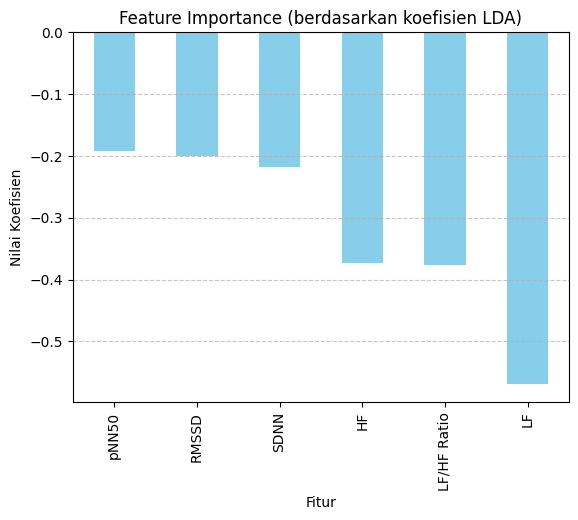

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# === 1. Load Dataset ===
df = pd.read_csv("../Data/combine-feature.csv")

features = ["LF", "HF", "LF/HF Ratio", "SDNN", "RMSSD", "pNN50"]
X = df[features]
y = df["Class"]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Latih LDA ===
lda = LinearDiscriminantAnalysis(
    solver='lsqr',  
    shrinkage=0.95,  
    priors=[0.5, 0.5],  
    n_components=1,   
)
lda.fit(X_scaled, y)

# === 3. Ambil bobot koefisien tiap fitur ===
importance = pd.Series(lda.coef_[0], index=features).sort_values(ascending=False)

print("Bobot (koefisien) fitur dari LDA:")
print(importance)

# === 4. Visualisasi (opsional) ===
import matplotlib.pyplot as plt

importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance (berdasarkan koefisien LDA)")
plt.ylabel("Nilai Koefisien")
plt.xlabel("Fitur")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()
